<a href="https://colab.research.google.com/github/plaban1981/One-Class-Classification/blob/master/One_Class_Classification_Algorithms_for_Imbalanced_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outliers
Outliers or anomalies are rare examples that do not fit in with the rest of the data.

https://machinelearningmastery.com/one-class-classification-algorithms/


**Identifying outliers in data is referred to as outlier or anomaly detection and a subfield of machine learning focused on this problem is referred to as one-class classification.**

These are **unsupervised learning algorithms** that attempt to model “normal” examples in order to classify new examples as either normal or abnormal (e.g. outliers).

* One-class classification algorithms can be used for binary classification tasks with a severely skewed class distribution.
* one-class classification algorithms can be effective for imbalanced classification datasets where there are none or very few examples of the minority class, or datasets where there is no coherent structure to separate the classes that could be learned by a supervised algorithm.

## Objective 

* **One-class classification** is a field of machine learning that provides techniques for outlier and anomaly detection.
* How to **adapt one-class classification algorithms for imbalanced classification with a severely skewed class distribution**.
* How to fit and evaluate **one-class classification algorithms such as SVM, isolation forest, elliptic envelope, and local outlier factor**.

## One-Class Classification for Imbalanced Data

**The process of identifying outliers in a dataset is generally referred to as anomaly detection, where the outliers are “anomalies,” and the rest of the data is “normal.”** 

Outlier detection or anomaly detection is a challenging problem and is comprised of a range of techniques.


#### In machine learning, one approach to tackling the problem of anomaly detection is one-class classification.

**One-Class Classification, or OCC** for short, involves fitting a model on the “normal” data and predicting whether new data is normal or an outlier/anomaly.

**One-class classification techniques can be used for binary (two-class) imbalanced classification problems where the negative case (class 0) is taken as “normal” and the positive case (class 1) is taken as an outlier or anomaly.**

* Negative Case: Normal or inlier.
* Positive Case: Anomaly or outlier.

## Generate and plot a synthetic imbalanced classification dataset


Counter({0: 9990, 1: 10})


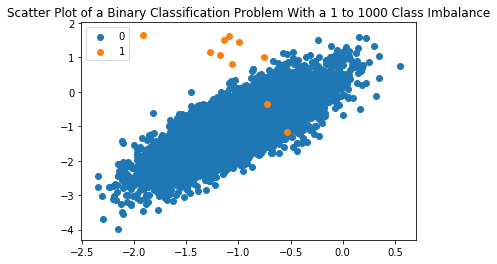

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.title('Scatter Plot of a Binary Classification Problem With a 1 to 1000 Class Imbalance')
plt.show()

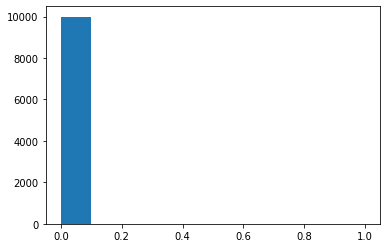

In [34]:
plt.hist(y)
plt.show()

0 is the majority class here

This severe class imbalance with so few examples in the positive class and the unstructured nature of the few examples in the positive class might make a good basis for using one-class classification methods.

##One-Class Support Vector Machines

In [0]:
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

## Split the training data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

## define outlier detection model

#### In this case, we will try fitting on just those examples in the training set that belong to the majority class.

In [7]:
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = X_train[y_train ==0]
model.fit(trainX)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

Once fit, the model can be used to identify outliers in new data.

When calling the predict() function on the model, it will output a +1 for normal examples, so-called inliers, and a -1 for outliers.

* Inlier Prediction: +1
* Outlier Prediction: -1

## detect outliers in the test set

In [0]:
yhat = model.predict(X_test)

In [9]:
yhat

array([1, 1, 1, ..., 1, 1, 1])

If we want to evaluate the performance of the model as a binary classifier, we must change the labels in the test dataset from 0 and 1 for the majority and minority classes respectively, to +1 and -1.

In [0]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1

## calculate F1 score for the imbalanced dataset

In [16]:
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.123


## Isolation Forest
Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way to isolate anomalies that are both few in number and different in the feature space.

In [19]:
from sklearn.ensemble import IsolationForest
# define outlier detection model
model = IsolationForest(contamination=0.01, behaviour='new')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


0.9963862678177073

In [20]:
Counter(y_test)

Counter({-1: 5, 1: 4995})

In [21]:
Counter(y_pred)

Counter({-1: 33, 1: 4967})

The model is probably best trained on examples that exclude outliers. In this case, we fit the model on the input features for examples from the majority class only.


Like one-class SVM, the model will predict an inlier with a label of +1 and an outlier with a label of -1, therefore, the labels of the test set must be changed before evaluating the predictions.

In [24]:
# fit on majority class
trainX = X_train[y_train==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(X_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
print(Counter(y_test))
# calculate score
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Counter({-1: 5000})
F1 Score: 0.012
